In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [93]:
df=pd.read_csv("covid_19_clean_complete (1).csv",parse_dates=True)

In [94]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [95]:
#Renaming the columns
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

In [96]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [97]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [98]:
# Visually  analysing the trends
df["date"].max()

'2020-07-27'

In [99]:
#countries having most active cases in any particular date
recent_day = df[df["date"]== "2020-07-27"]
recent_day

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean,9796
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe,1991
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa,7973
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe,52
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa,667
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [100]:
world = recent_day.groupby("country")[["confirmed","active","deaths","recovered"]].sum().reset_index()
world

,country,confirmed,active,deaths,recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [101]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Active Cases")
figure.show()

In [102]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="confirmed",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="greens",
                       title="Countries with Confirmed Cases")
figure.show()

C:\Users\user\AppData\Local\Temp\ipykernel_41940\1810550144.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

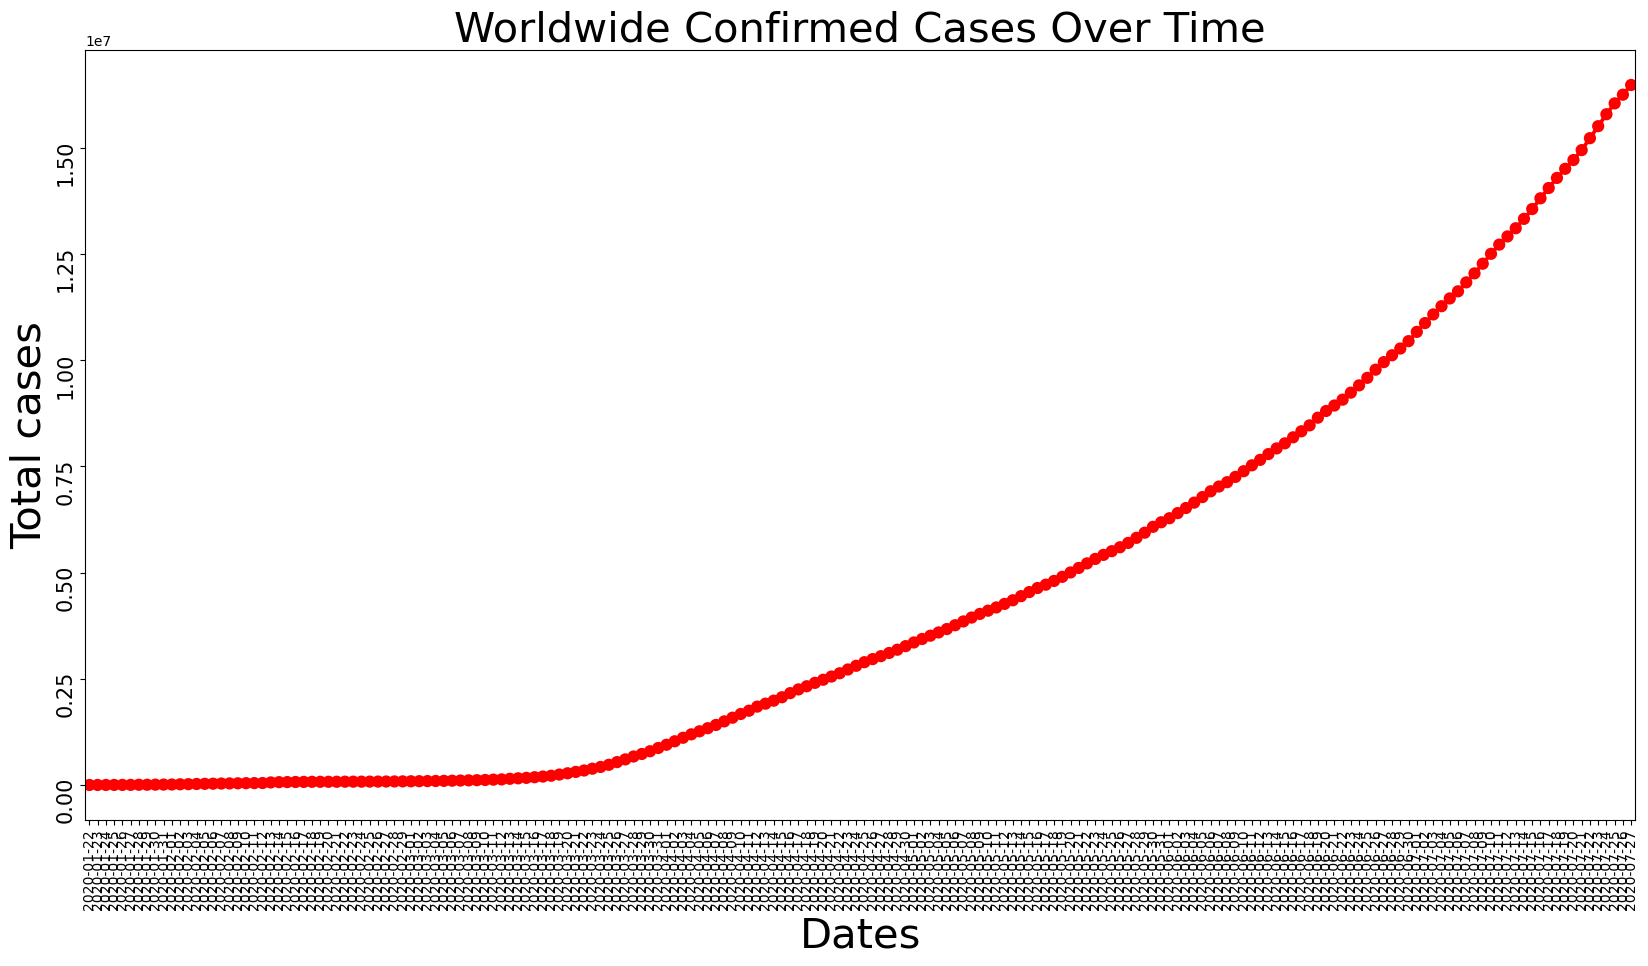

In [103]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

C:\Users\user\AppData\Local\Temp\ipykernel_41940\3915788143.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

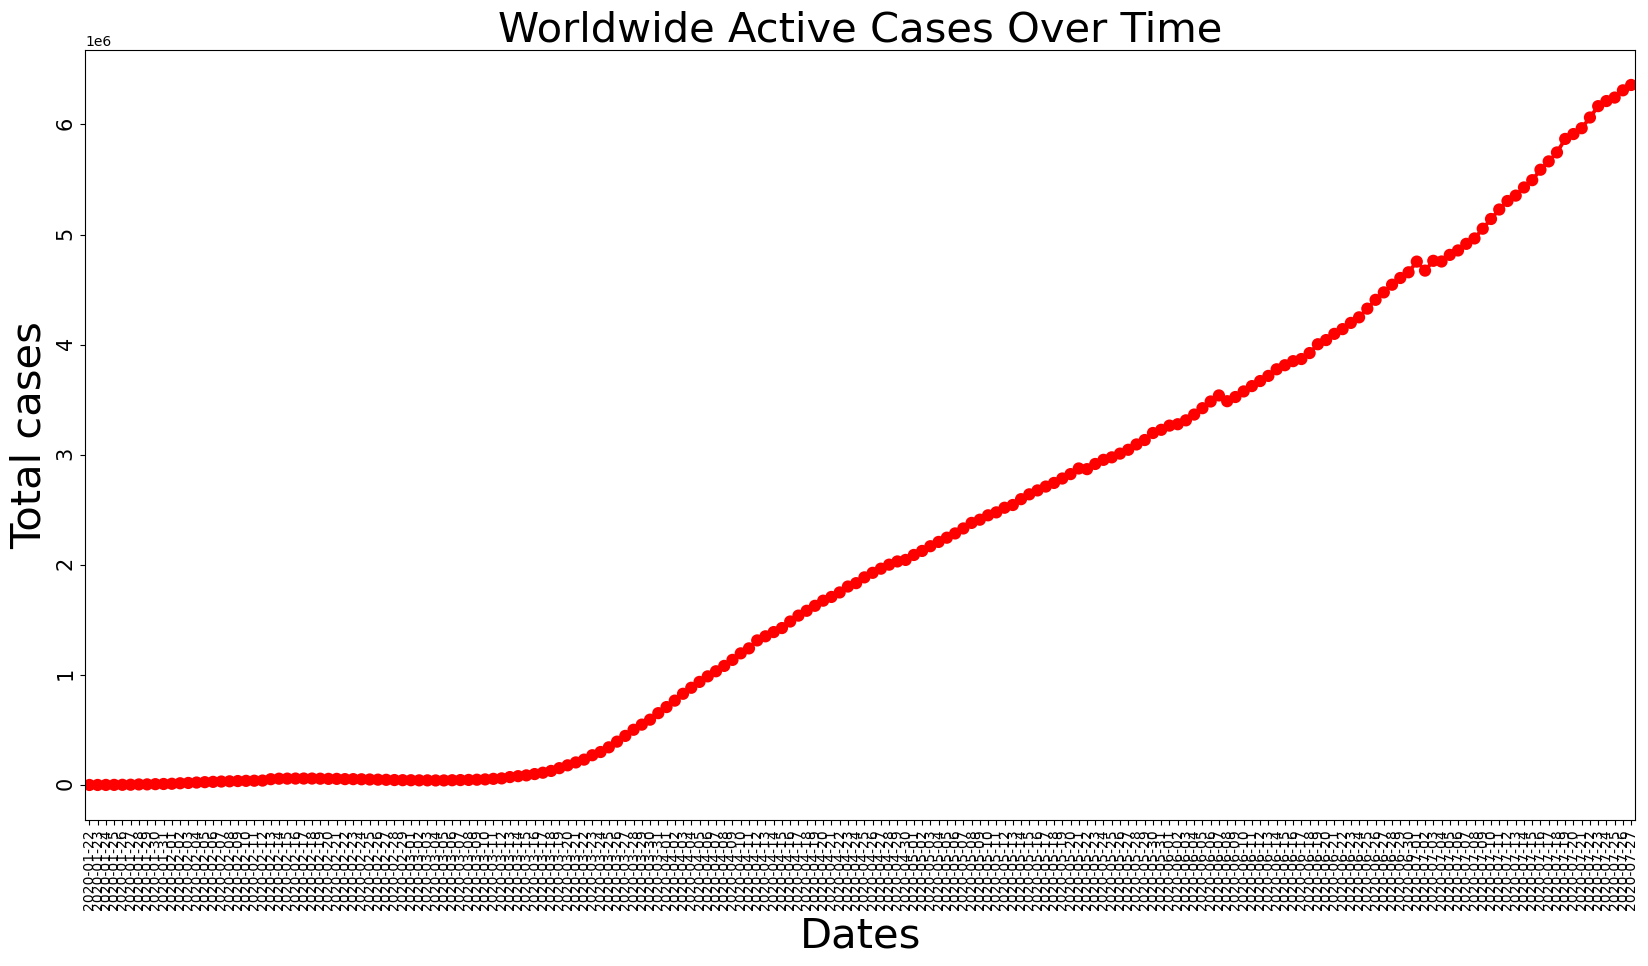

In [104]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Active Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','active'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.active, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

C:\Users\user\AppData\Local\Temp\ipykernel_41940\1370935510.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

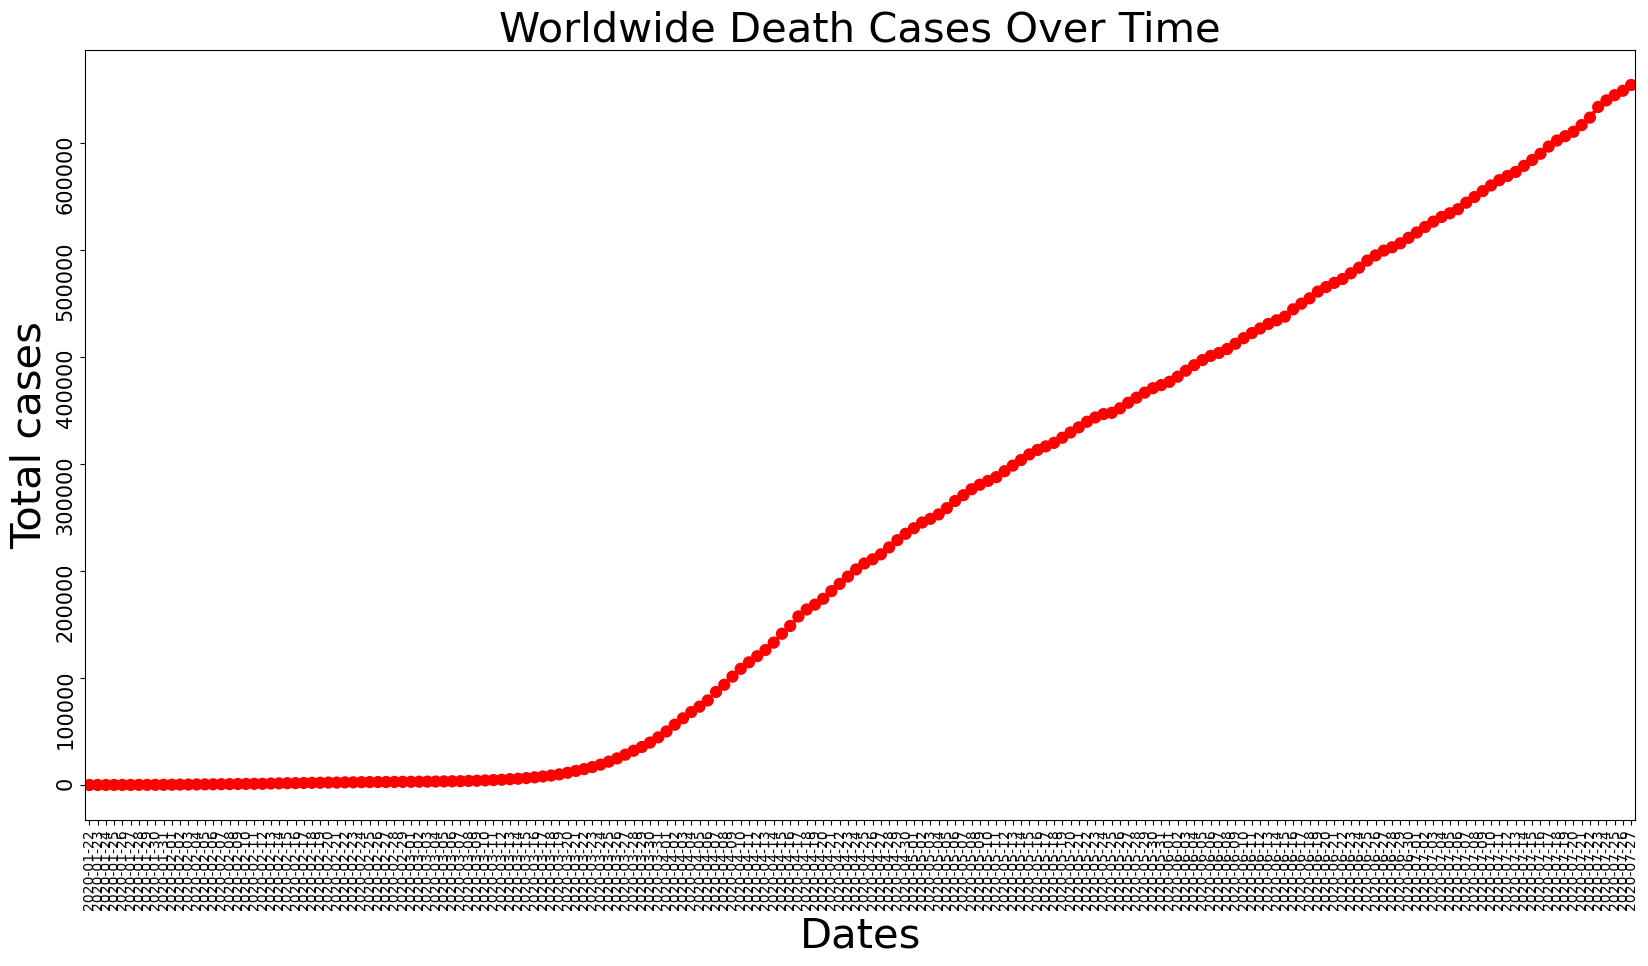

In [105]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Death Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','deaths'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.deaths, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

C:\Users\user\AppData\Local\Temp\ipykernel_41940\309253303.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

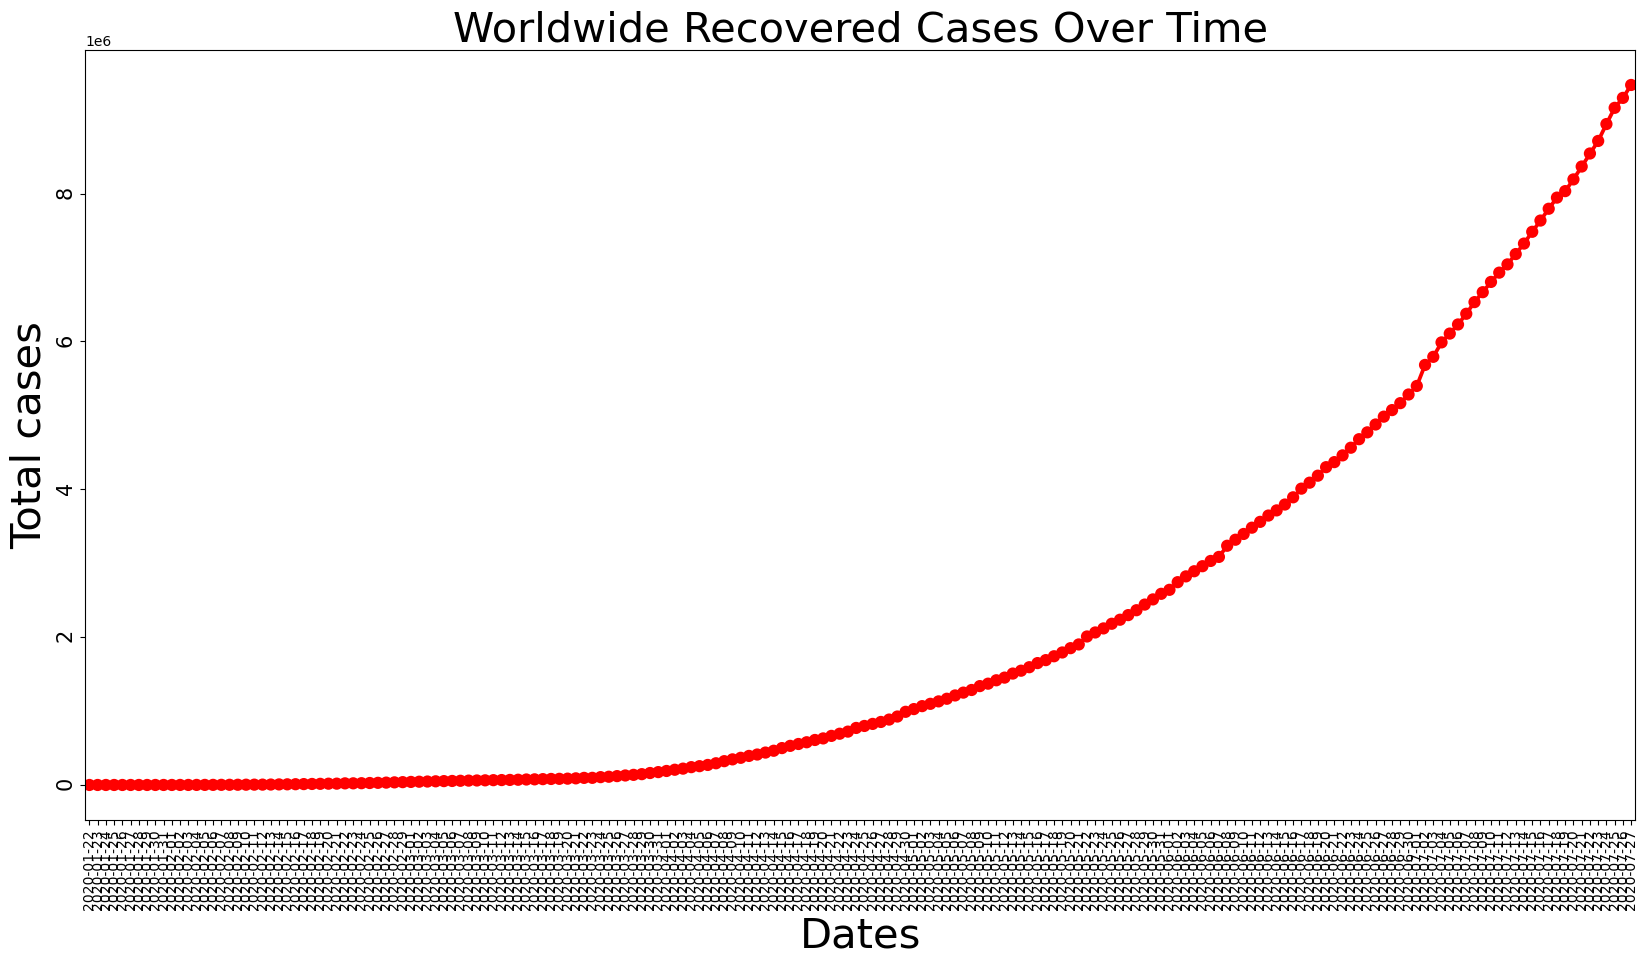

In [106]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Recovered Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','recovered'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.recovered, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [107]:
# Top 20 countries with highest active cases in the most recent day
top_actives = recent_day.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

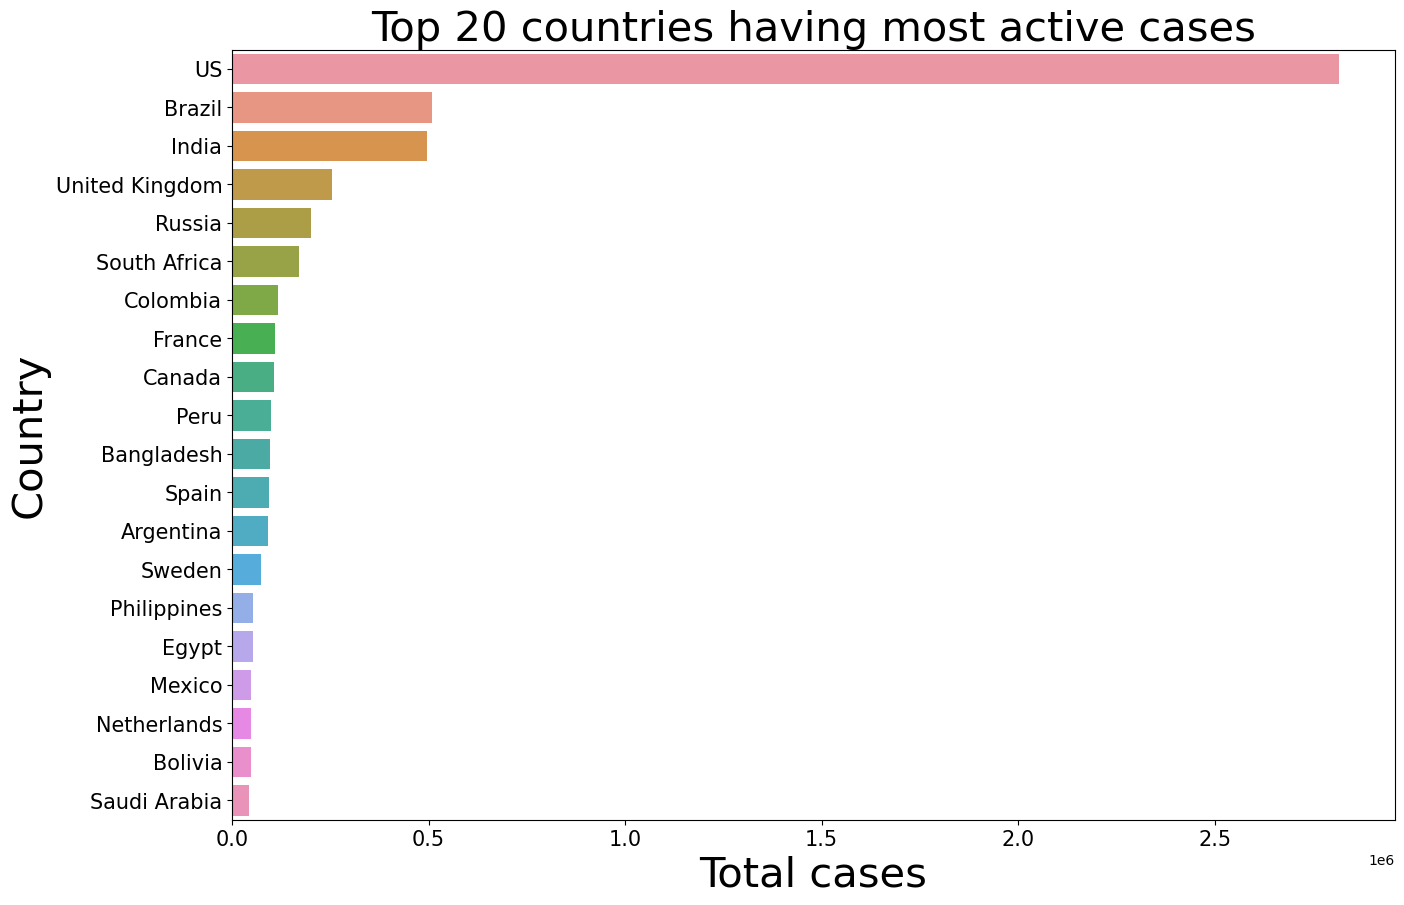

In [108]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [109]:
# Top 20 countries with highest confirmed cases in the most recent day
top_confirmed = recent_day.groupby(by="country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()
top_confirmed

,country,confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

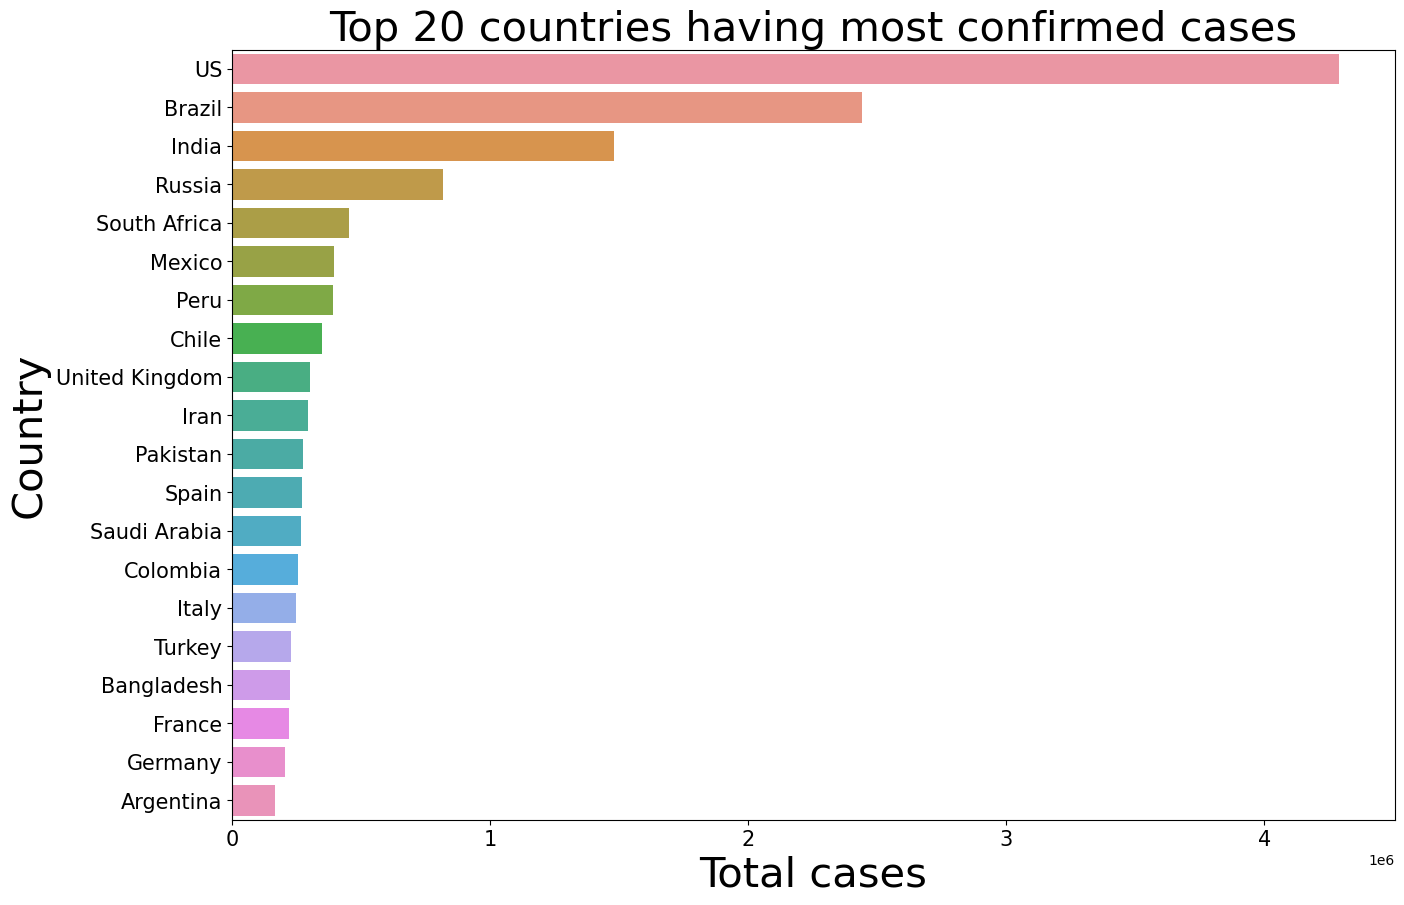

In [110]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirmed.confirmed, y=top_confirmed.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [111]:
# Top 20 countries with highest death cases in the most recent day
top_deaths = recent_day.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

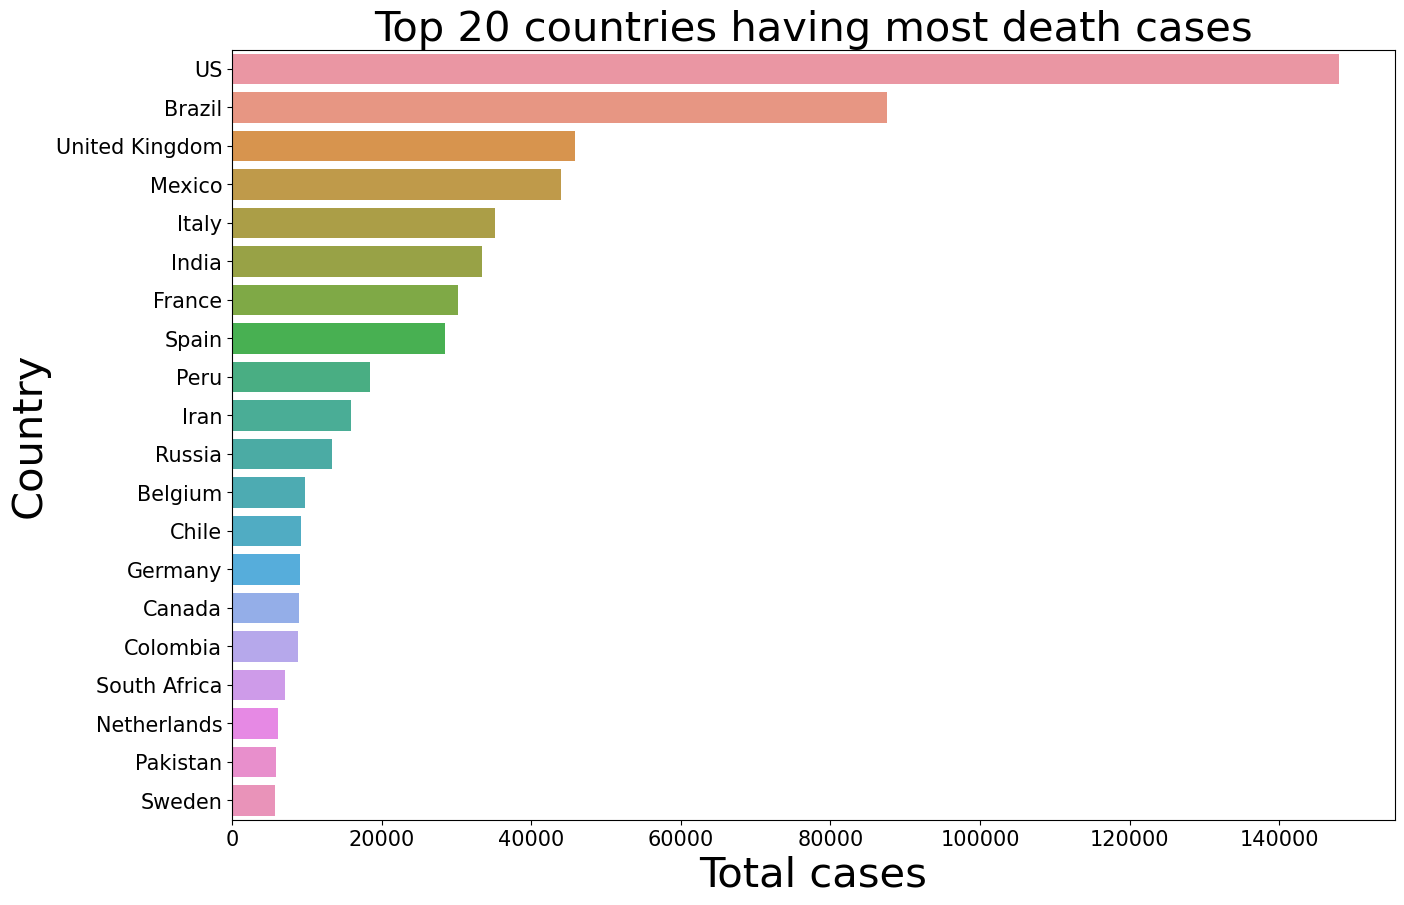

In [112]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [113]:
# Top 20 countries with highest death cases in the most recent day
top_recovered = recent_day.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
top_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

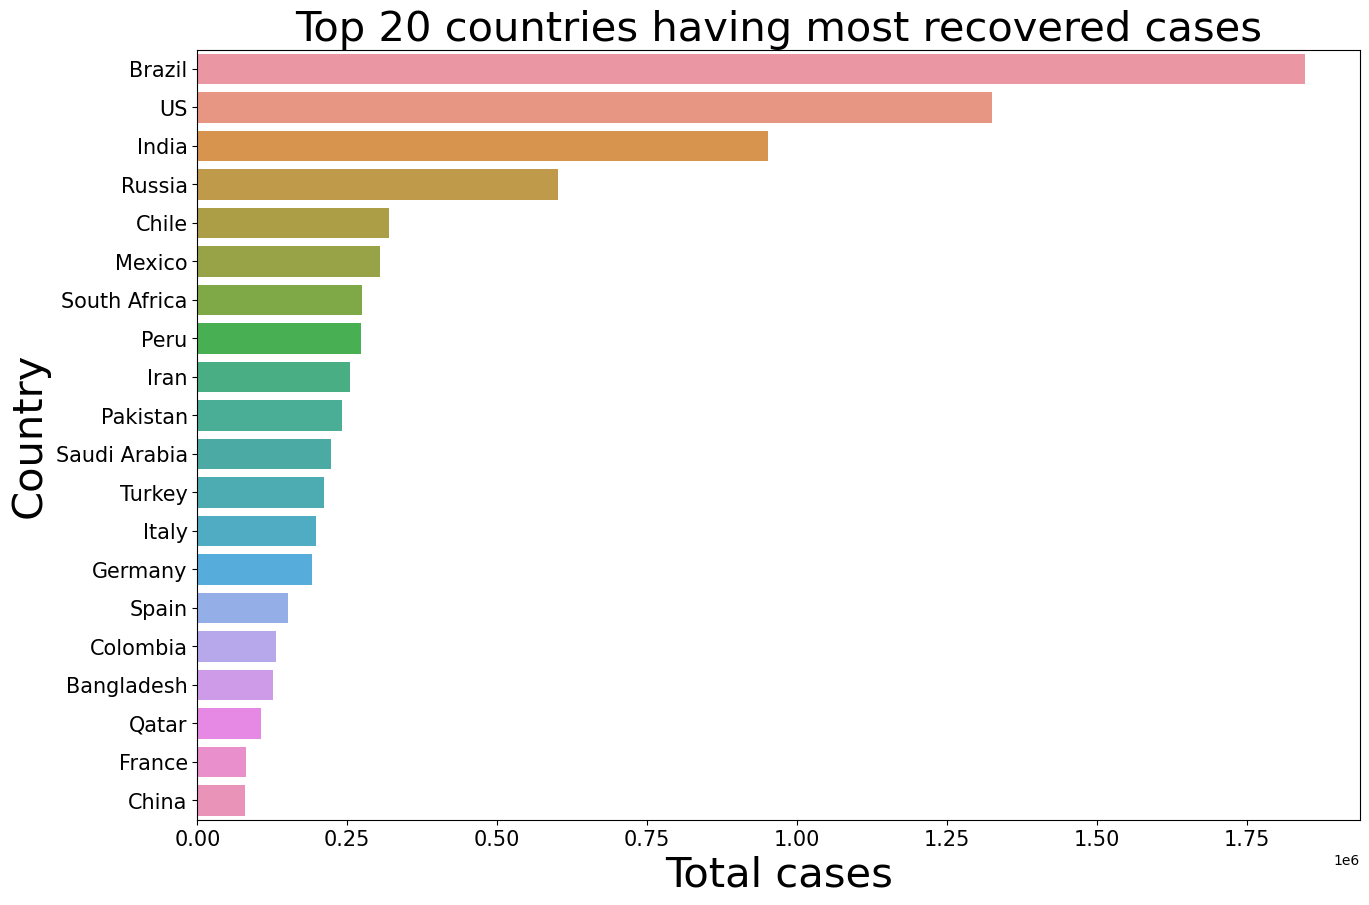

In [114]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=top_recovered.recovered, y=top_recovered.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [115]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil

C:\Users\user\AppData\Local\Temp\ipykernel_41940\2005210671.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [116]:
UK = df[df.country == "United Kingdom"]
UK = UK.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
UK

C:\Users\user\AppData\Local\Temp\ipykernel_41940\1060693073.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1425,45639,298731,251667
184,2020-07-24,1425,45762,299500,252313
185,2020-07-25,1427,45823,300270,253020
186,2020-07-26,1434,45837,301020,253749


In [117]:
India = df[df.country == "India"]
India = India.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
India

C:\Users\user\AppData\Local\Temp\ipykernel_41940\3664885748.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


In [118]:
US = df[df.country == "US"]
US = US.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
US

C:\Users\user\AppData\Local\Temp\ipykernel_41940\3151174300.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [119]:
russia = df[df.country == "Russia"]
russia = russia.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
russia

C:\Users\user\AppData\Local\Temp\ipykernel_41940\884111957.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


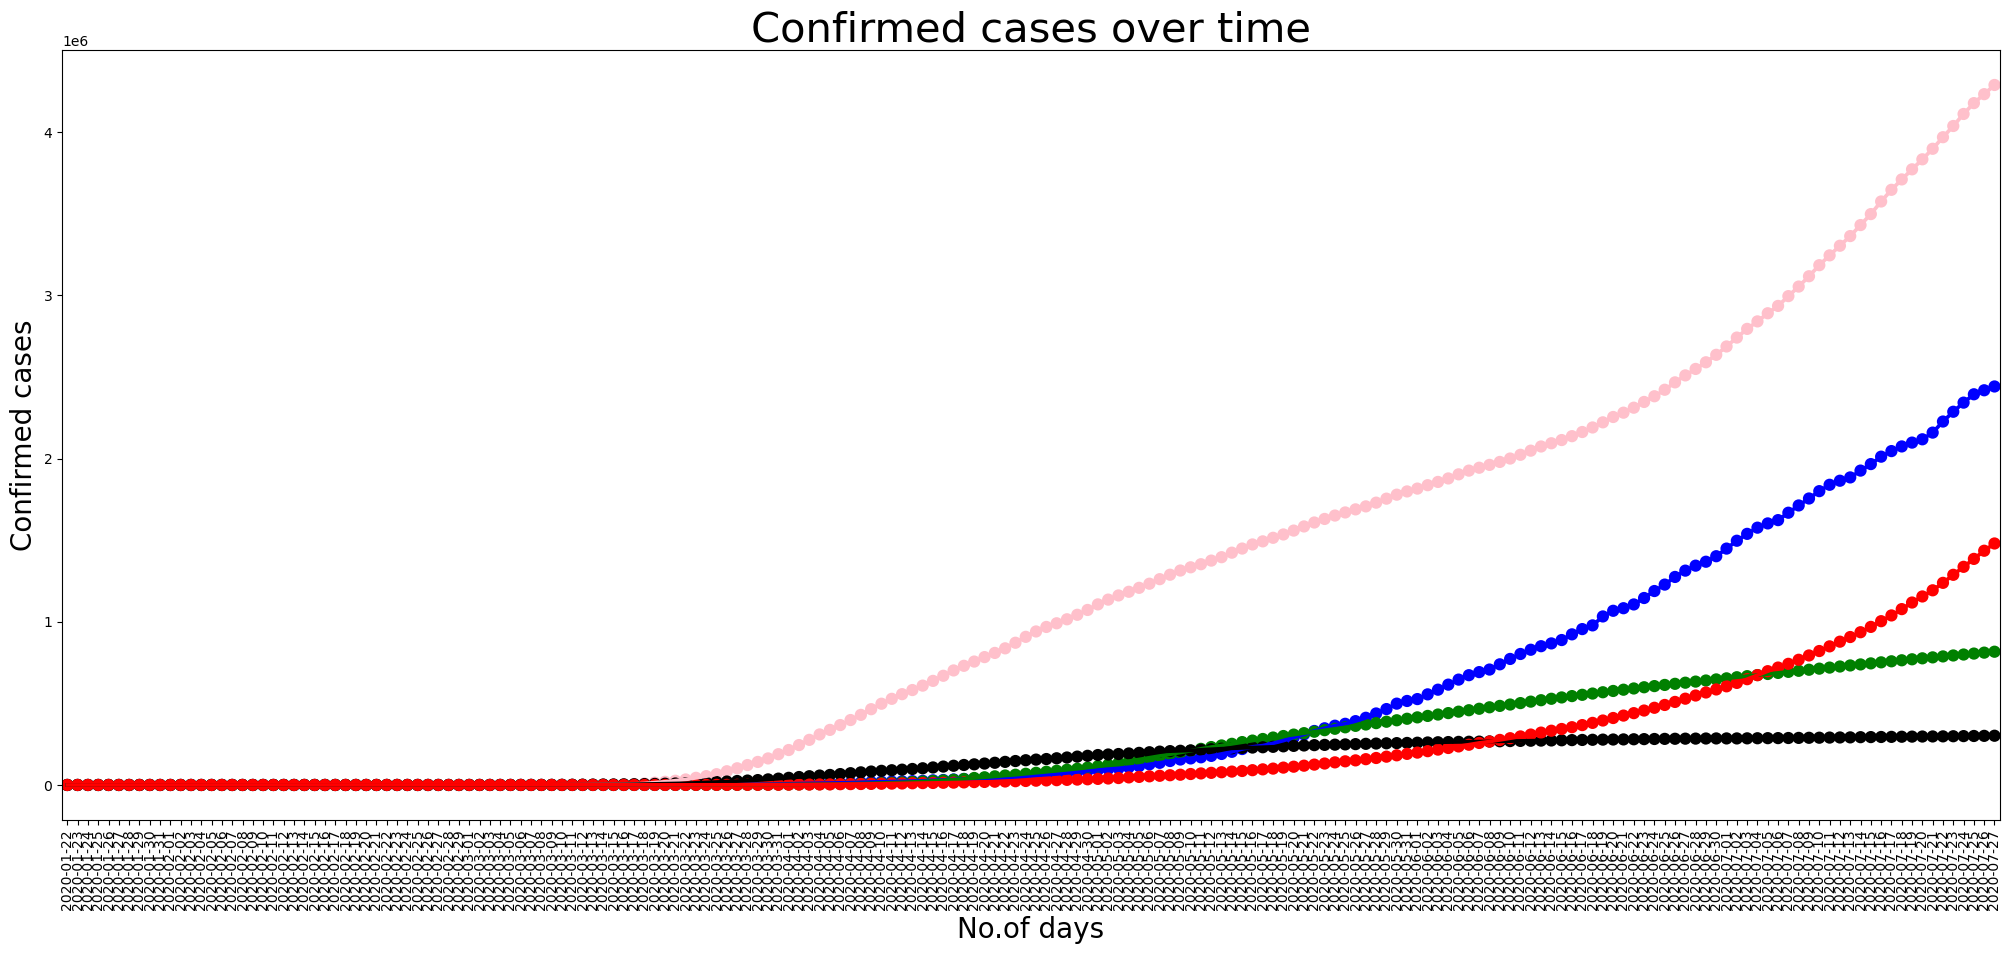

In [120]:
# lets compare the trend of confirmed cases
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.confirmed,color="Blue")
sns.pointplot(x=US.date,y=US.confirmed,color="Pink")
sns.pointplot(x=russia.date,y=russia.confirmed,color="Green")
sns.pointplot(x=UK.date,y=UK.confirmed,color="black")
sns.pointplot(x=India.date,y=India.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

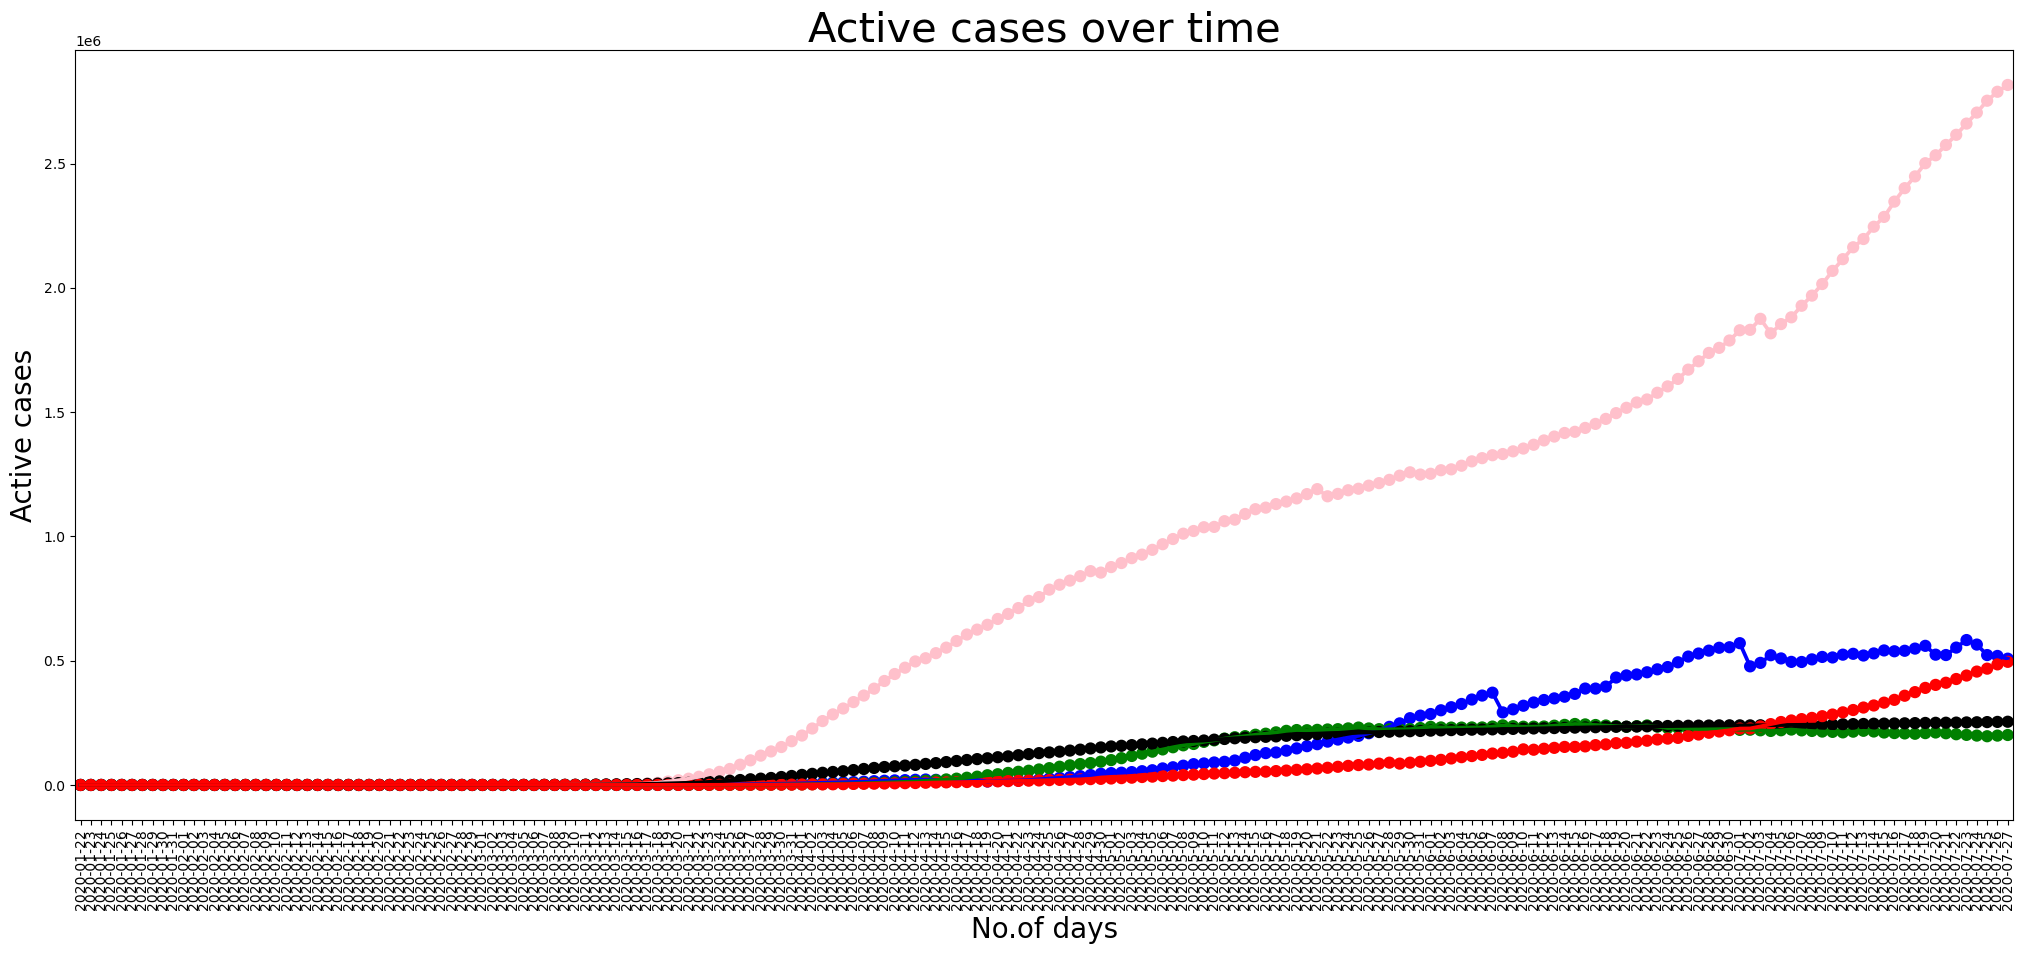

In [121]:
# lets compare the trend of active cases
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.active,color="Blue")
sns.pointplot(x=US.date,y=US.active,color="Pink")
sns.pointplot(x=russia.date,y=russia.active,color="Green")
sns.pointplot(x=UK.date,y=UK.active,color="black")
sns.pointplot(x=India.date,y=India.active,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Active cases',fontsize=20)
plt.title('Active cases over time',fontsize=30)
plt.show()

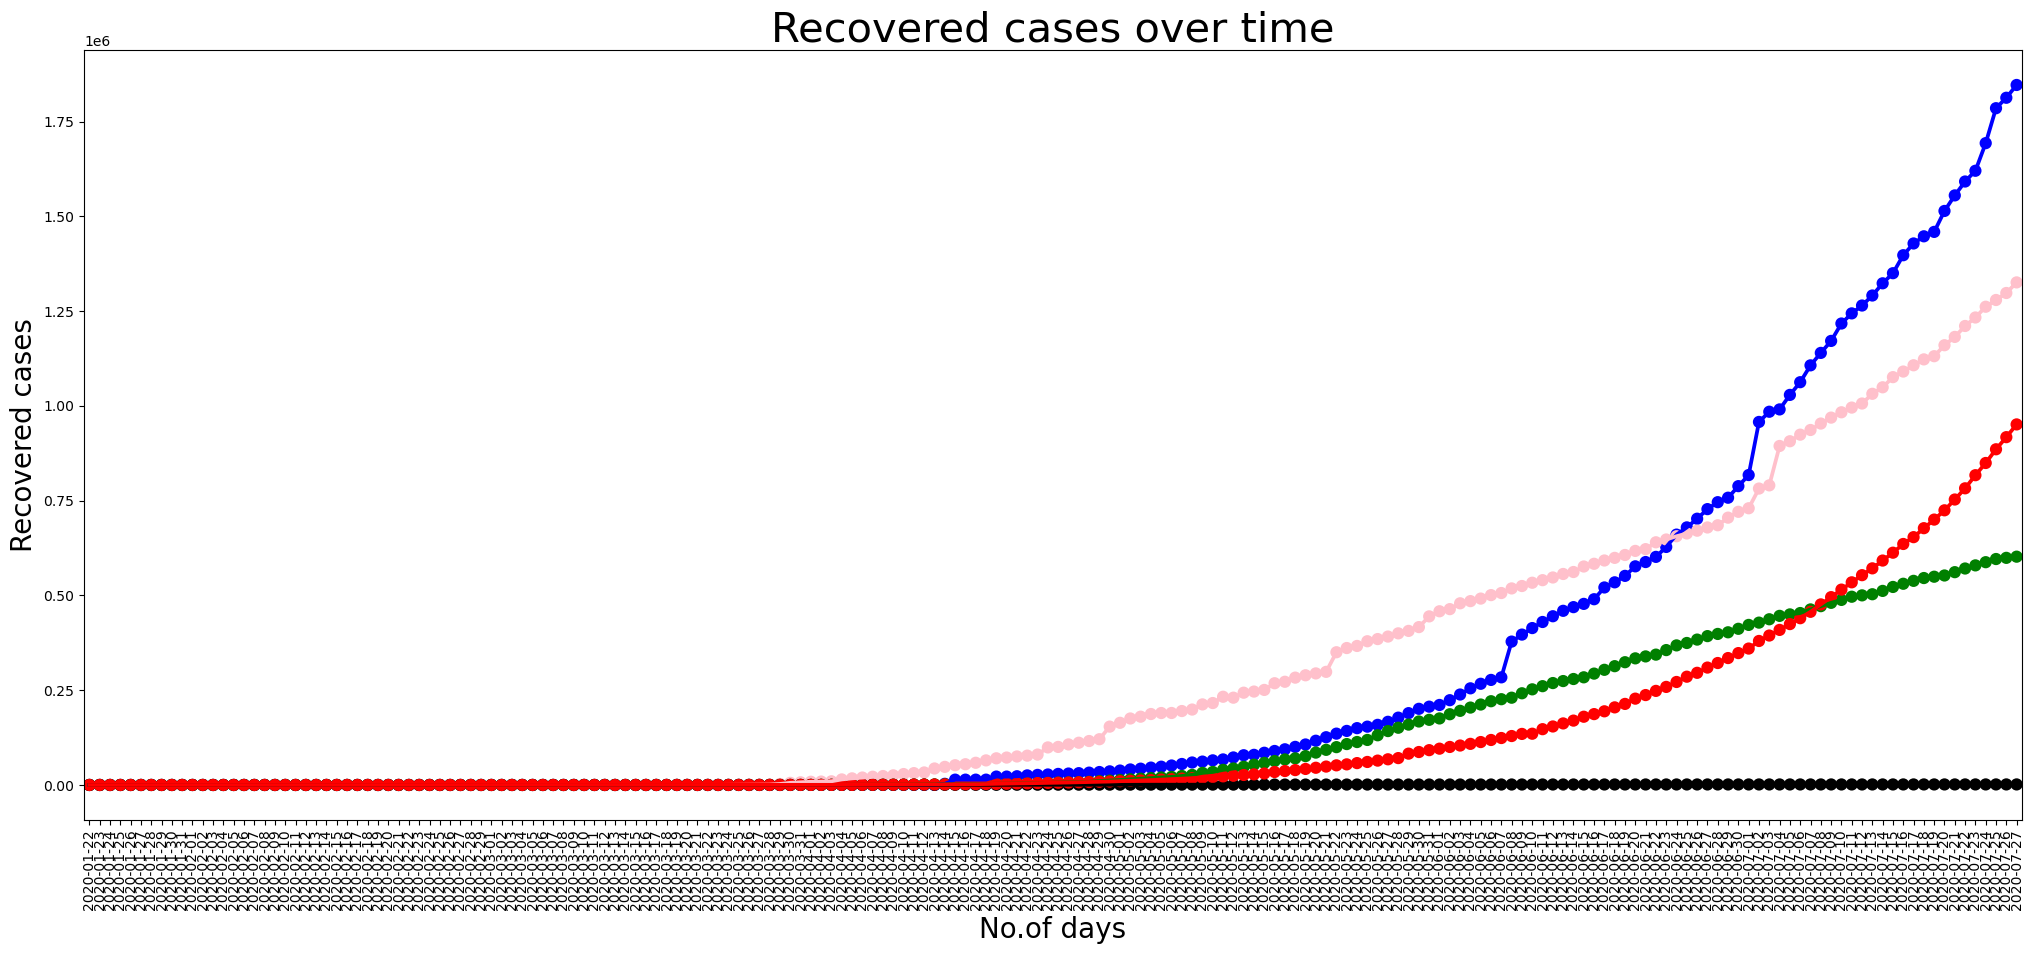

In [122]:
# lets compare the trend of recovered cases
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.recovered,color="Blue")
sns.pointplot(x=US.date,y=US.recovered,color="Pink")
sns.pointplot(x=russia.date,y=russia.recovered,color="Green")
sns.pointplot(x=UK.date,y=UK.recovered,color="black")
sns.pointplot(x=India.date,y=India.recovered,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Recovered cases',fontsize=20)
plt.title('Recovered cases over time',fontsize=30)
plt.show()

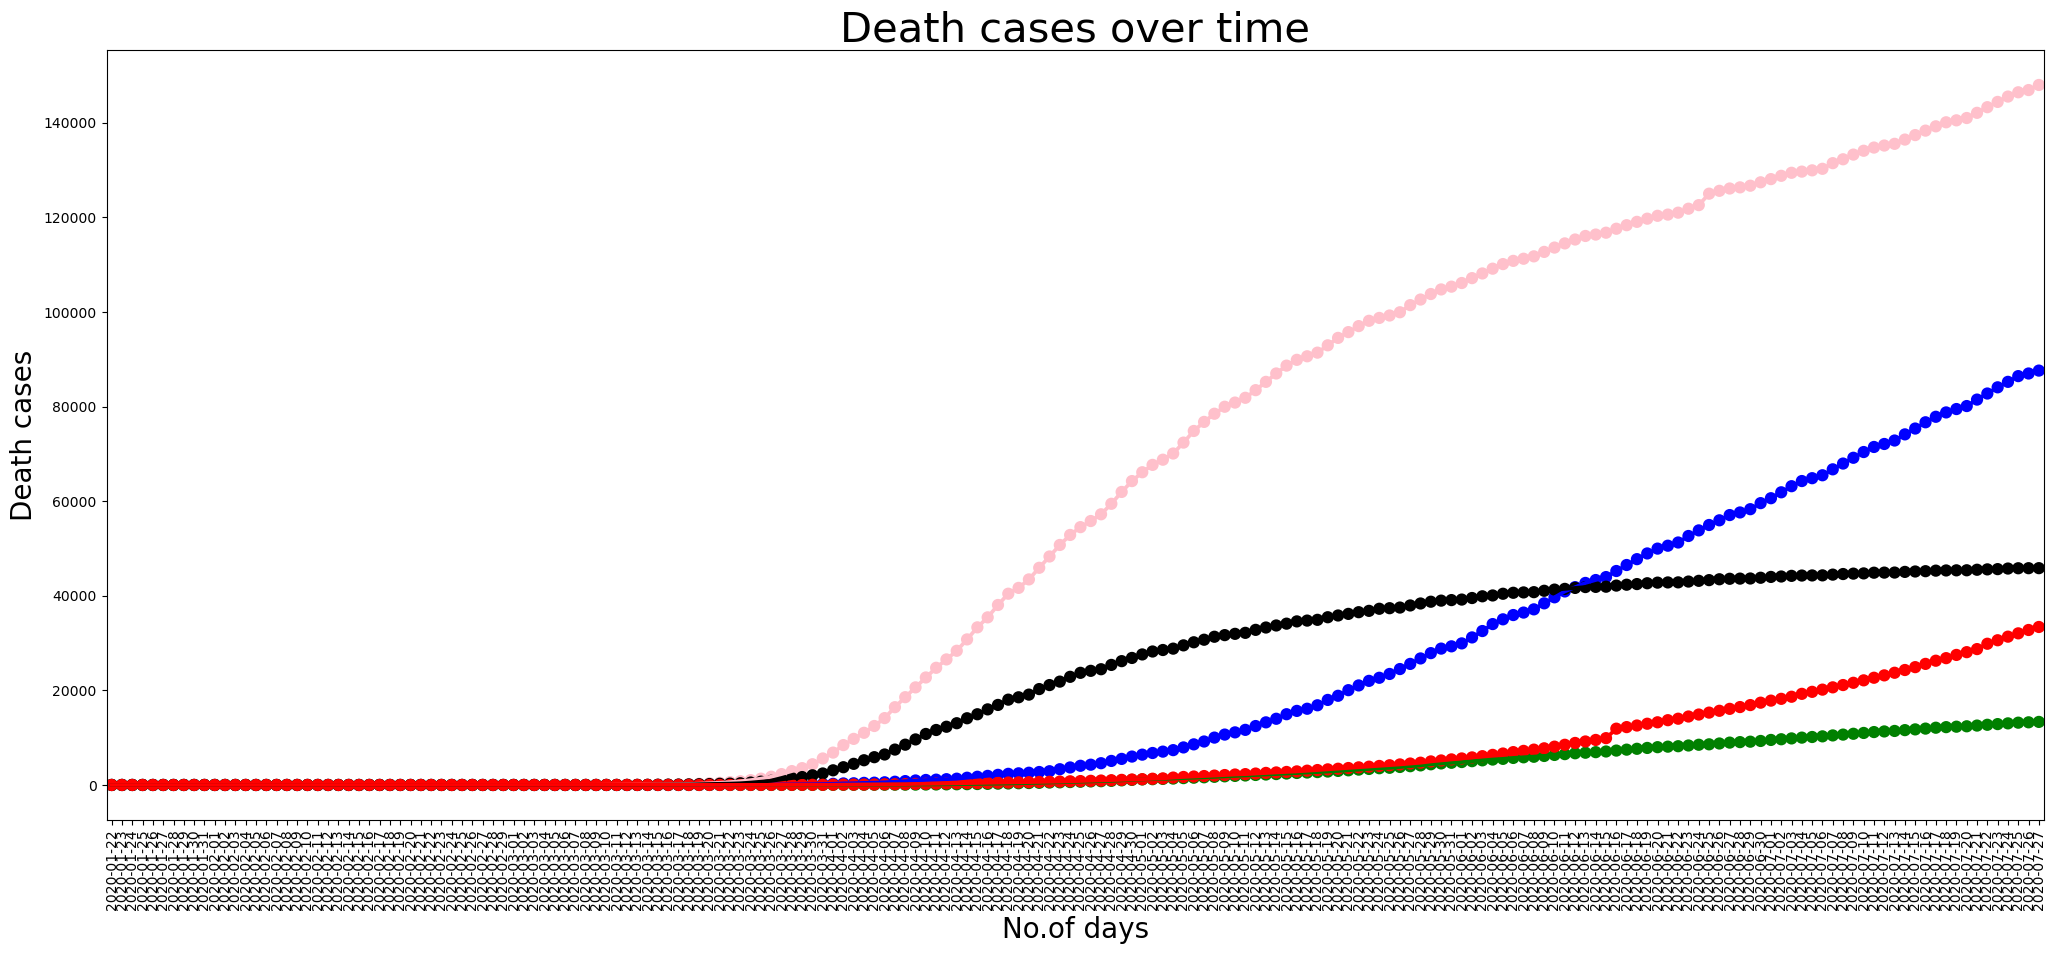

In [123]:
# lets compare the trend of deaths cases
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date,y=brazil.deaths,color="Blue")
sns.pointplot(x=US.date,y=US.deaths,color="Pink")
sns.pointplot(x=russia.date,y=russia.deaths,color="Green")
sns.pointplot(x=UK.date,y=UK.deaths,color="black")
sns.pointplot(x=India.date,y=India.deaths,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Death cases',fontsize=20)
plt.title('Death cases over time',fontsize=30)
plt.show()

# Forecasting

In [124]:
!pip install prophet

In [125]:
from prophet import Prophet

In [126]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [127]:
Confirmed=df.groupby('date').sum()['confirmed'].reset_index()
Deaths=df.groupby('date').sum()['deaths'].reset_index()
Recovered=df.groupby('date').sum()['recovered'].reset_index()
Active=df.groupby('date').sum()['Active'].reset_index()

In [128]:
Confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [129]:
Deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [130]:
Recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [131]:
Active

,date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [132]:
#forecasting for confirmed cases
Confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [133]:
model=Prophet(interval_width=0.95)

In [134]:
model.fit(Confirmed)

12:34:36 - cmdstanpy - INFO - Chain [1] start processing
12:34:36 - cmdstanpy - INFO - Chain [1] done processing


In [135]:
future=model.make_future_dataframe(periods=15)

In [136]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [137]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632401e+07,1.616388e+07,1.647684e+07
189,2020-07-29,1.653405e+07,1.637211e+07,1.669885e+07
190,2020-07-30,1.674820e+07,1.658119e+07,1.691097e+07
191,2020-07-31,1.696362e+07,1.680724e+07,1.713120e+07
192,2020-08-01,1.717143e+07,1.700400e+07,1.734364e+07
193,2020-08-02,1.736922e+07,1.718637e+07,1.754813e+07
194,2020-08-03,1.756410e+07,1.737479e+07,1.775083e+07
195,2020-08-04,1.775370e+07,1.756883e+07,1.795814e+07
196,2020-08-05,1.796374e+07,1.776837e+07,1.818413e+07
197,2020-08-06,1.817789e+07,1.795314e+07,1.839638e+07


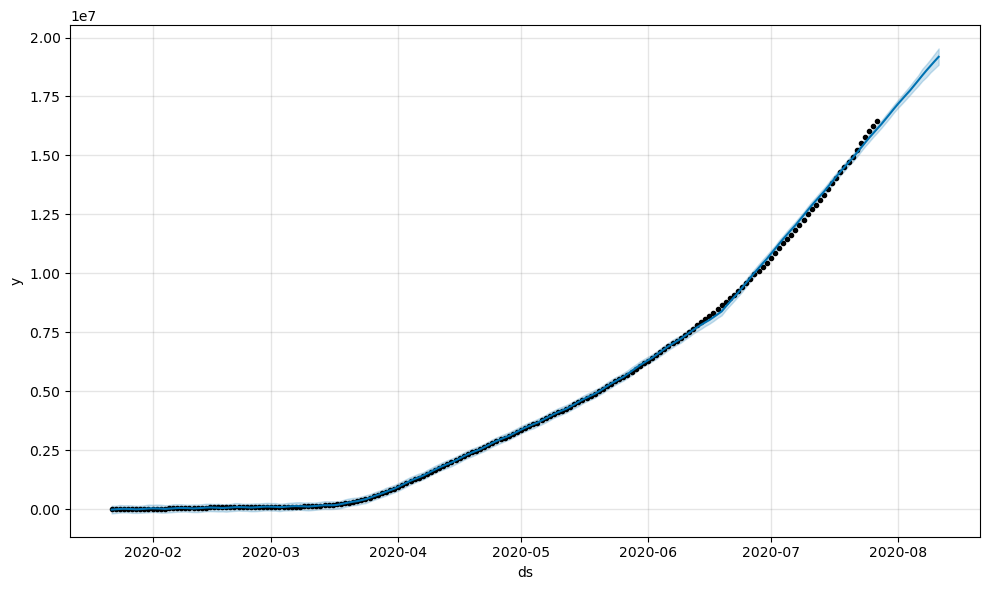

In [138]:
confirmed_forecast_plot = model.plot(forecast)

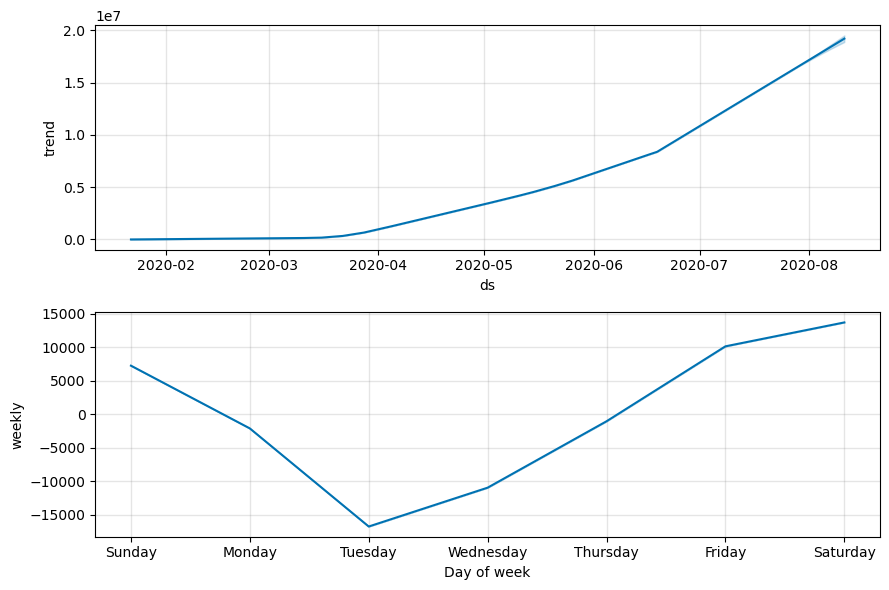

In [139]:
confirmed_forecast_plot1 = model.plot_components(forecast)

In [140]:
#forecasting for recovered cases
Recovered.rename(columns={"date":"ds","recovered":"y"},inplace=True)
Recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [141]:
model=Prophet(interval_width=0.95)

In [142]:
model.fit(Recovered)

12:34:38 - cmdstanpy - INFO - Chain [1] start processing
12:34:38 - cmdstanpy - INFO - Chain [1] done processing


In [143]:
future=model.make_future_dataframe(periods=15)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [144]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.313528e+06,9.201278e+06,9.433905e+06
189,2020-07-29,9.455717e+06,9.341204e+06,9.566464e+06
190,2020-07-30,9.598531e+06,9.488992e+06,9.726131e+06
191,2020-07-31,9.740095e+06,9.620729e+06,9.857326e+06
192,2020-08-01,9.880394e+06,9.760097e+06,1.000983e+07
193,2020-08-02,1.000646e+07,9.881245e+06,1.012919e+07
194,2020-08-03,1.014305e+07,1.000420e+07,1.028380e+07
195,2020-08-04,1.027046e+07,1.014175e+07,1.041357e+07
196,2020-08-05,1.041265e+07,1.027233e+07,1.055746e+07
197,2020-08-06,1.055547e+07,1.040834e+07,1.071823e+07


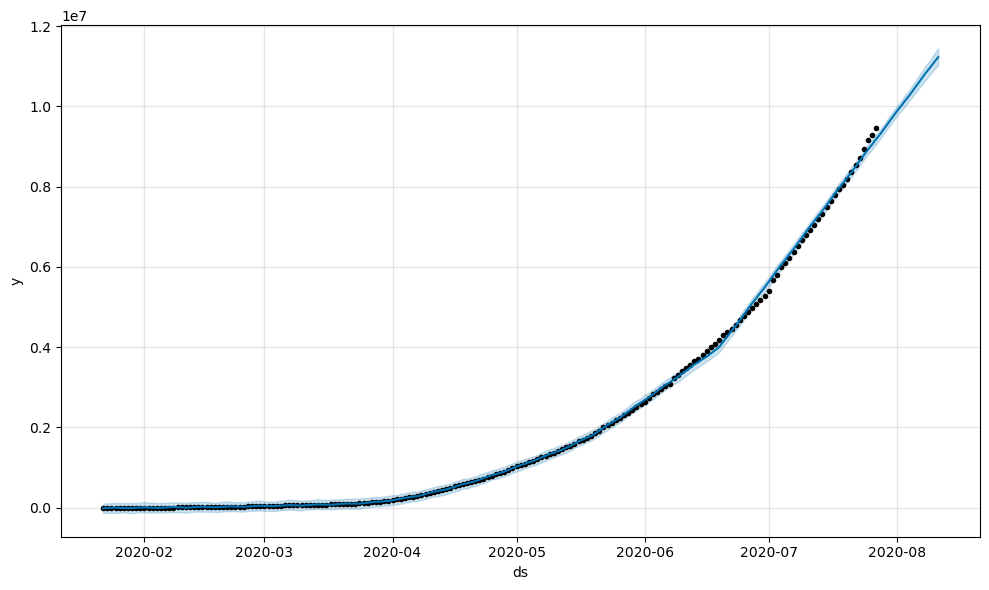

In [145]:
recovered_forecast_plot = model.plot(forecast)

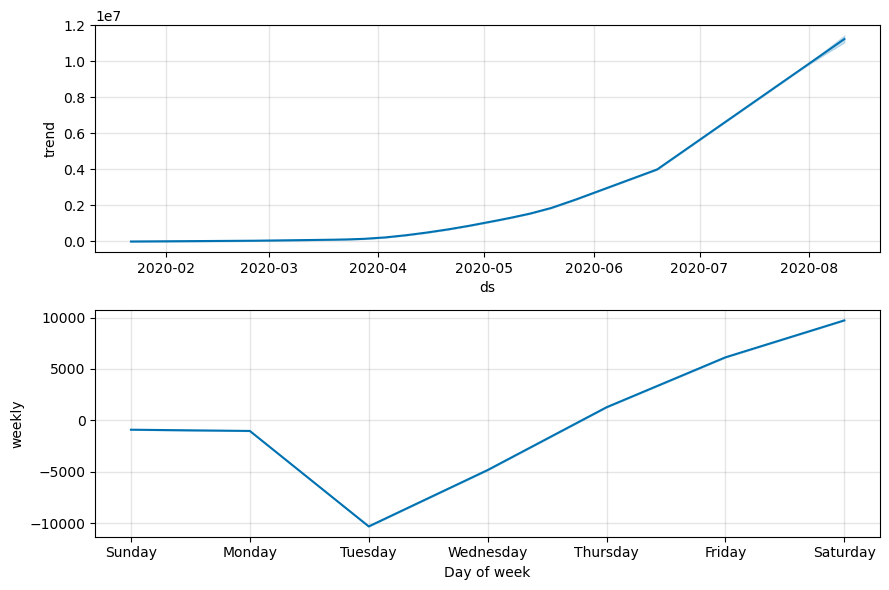

In [146]:
recovered_forecast_plot1 = model.plot_components(forecast)

In [155]:
#forecasting for active cases
Active.rename(columns={"date":"ds","Active":"y"},inplace=True)
Active

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [156]:
model=Prophet(interval_width=0.95)

In [157]:
model.fit(Active)

12:38:55 - cmdstanpy - INFO - Chain [1] start processing
12:38:55 - cmdstanpy - INFO - Chain [1] done processing


In [158]:
future=model.make_future_dataframe(periods=15)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [159]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,6.353204e+06,6.281666e+06,6.427065e+06
189,2020-07-29,6.415552e+06,6.346714e+06,6.488670e+06
190,2020-07-30,6.481007e+06,6.413377e+06,6.552893e+06
191,2020-07-31,6.549045e+06,6.473631e+06,6.619893e+06
192,2020-08-01,6.611208e+06,6.532397e+06,6.688228e+06
193,2020-08-02,6.678514e+06,6.599795e+06,6.755181e+06
194,2020-08-03,6.732249e+06,6.644531e+06,6.816134e+06
195,2020-08-04,6.788974e+06,6.709716e+06,6.872293e+06
196,2020-08-05,6.851321e+06,6.749038e+06,6.941498e+06
197,2020-08-06,6.916776e+06,6.819210e+06,7.026214e+06


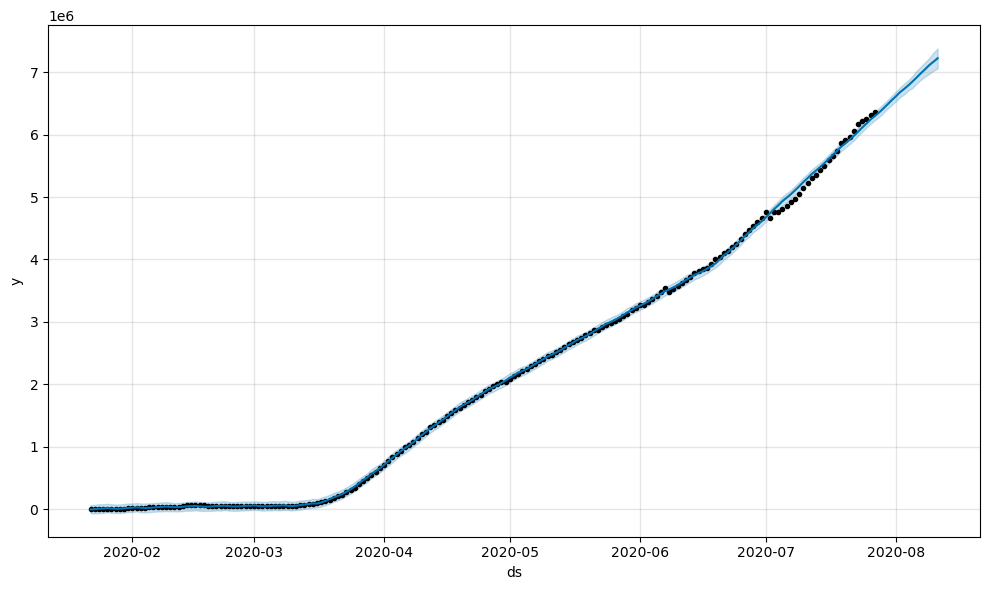

In [161]:
active_forecast_plot = model.plot(forecast)

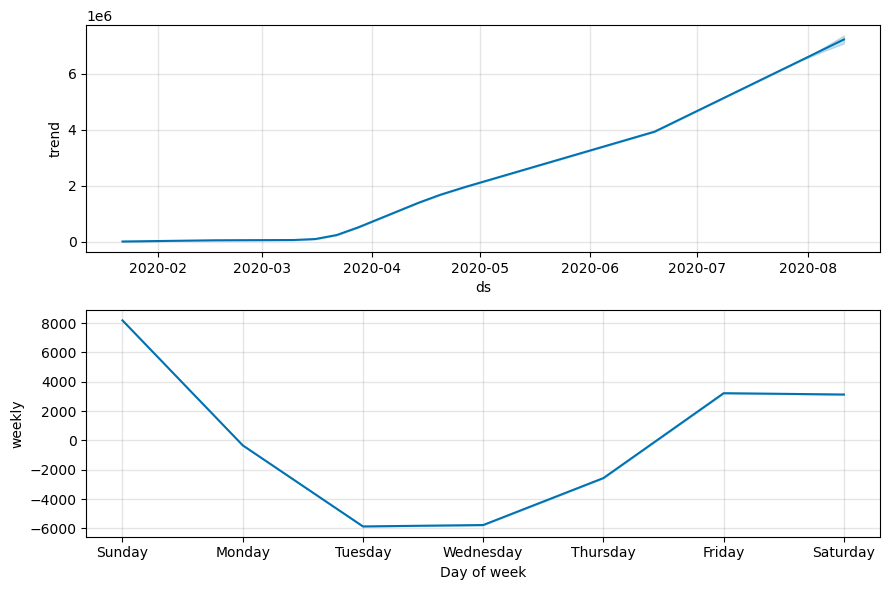

In [162]:
active_forecast_plot1 = model.plot_components(forecast)

In [164]:
#forecasting for deaths cases
Deaths.rename(columns={"date":"ds","deaths":"y"},inplace=True)
Deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [165]:
model=Prophet(interval_width=0.95)

In [167]:
model.fit(Deaths)

12:42:58 - cmdstanpy - INFO - Chain [1] start processing
12:42:58 - cmdstanpy - INFO - Chain [1] done processing


In [168]:
future=model.make_future_dataframe(periods=15)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [169]:
forecast = model.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652342.857217,649445.582579,655356.594551
189,2020-07-29,657910.776693,655087.093778,661130.479884
190,2020-07-30,663521.743356,660379.428248,666873.851143
191,2020-07-31,669038.962960,665064.893616,672480.146400
192,2020-08-01,673922.465056,669918.670725,677558.418318
193,2020-08-02,678060.469456,673839.247231,682613.506237
194,2020-08-03,682351.854619,676387.238331,687898.462891
195,2020-08-04,687559.891672,680565.425320,693895.465468
196,2020-08-05,693127.811149,685609.821472,699956.136243
197,2020-08-06,698738.777811,689855.485429,706803.306008


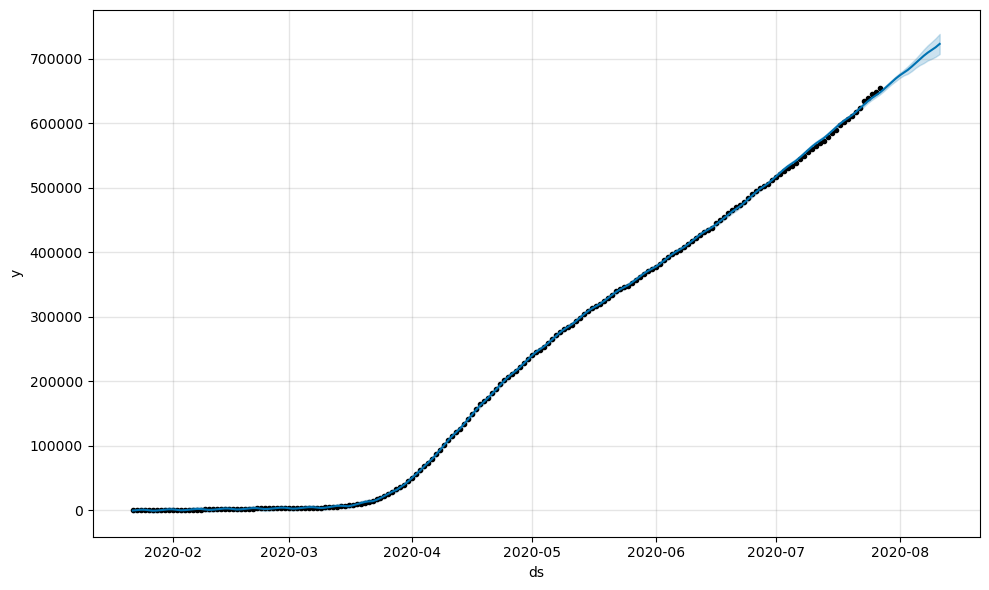

In [170]:
deaths_forecast_plot = model.plot(forecast)

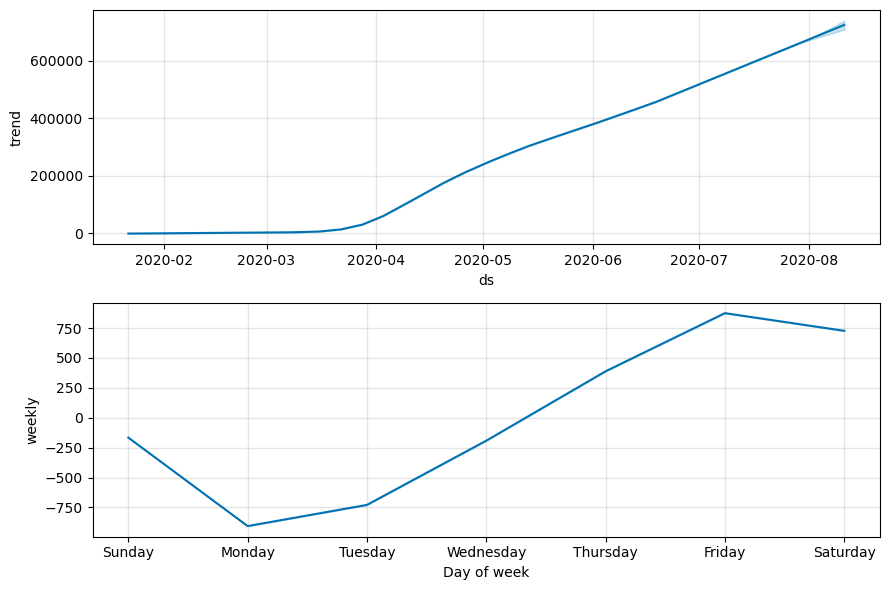

In [171]:
deaths_forecast_plot1 = model.plot_components(forecast)